# Exploração e tratamento de dados com Python

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dados
df = pd.read_csv("data/census.csv", sep=',', encoding='utf-8')

## EXPLORAÇÃO

In [3]:
# primeiras linhas
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# ultimas linhas
df.tail()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# dimensoes
df.shape

(32561, 15)

In [7]:
# atributos
df.columns.tolist()

['age',
 'workclass',
 'final-weight',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loos',
 'hour-per-week',
 'native-country',
 'income']

In [8]:
# informacoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# ausentes
df.isna().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [10]:
# descritiva
df.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [13]:
# label (income)
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

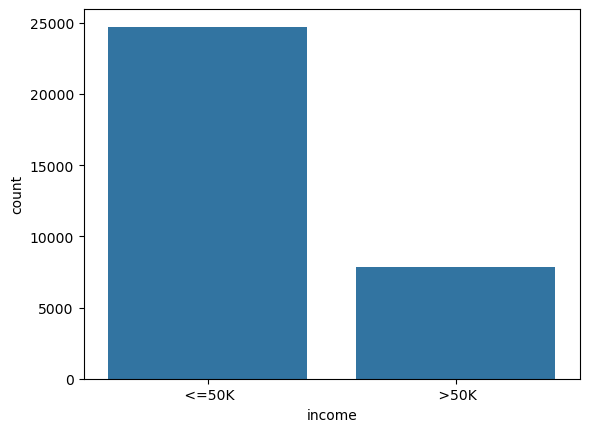

In [15]:
sns.countplot(x='income', data=df);

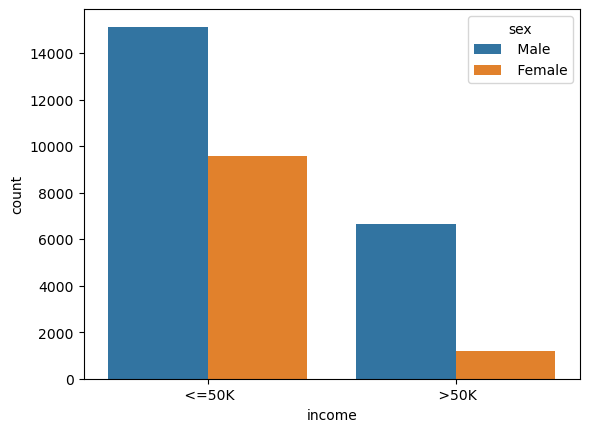

In [16]:
# label(income) por genero
sns.countplot(x='income', hue='sex', data=df);

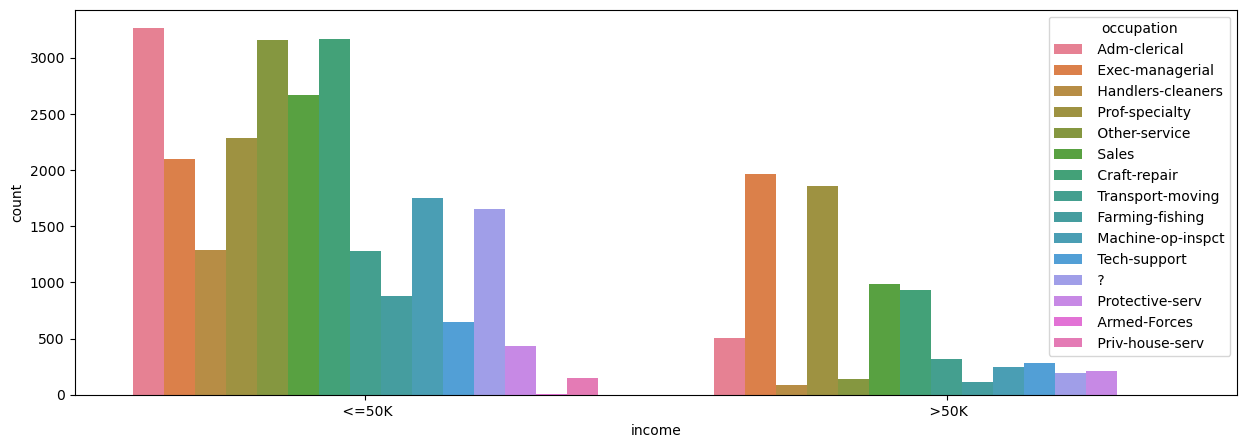

In [19]:
# income por ocupacao
plt.figure(figsize=(15,5))
sns.countplot(x='income', hue='occupation', data=df);

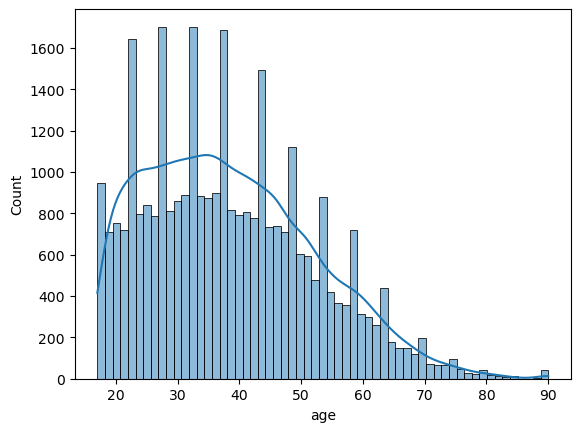

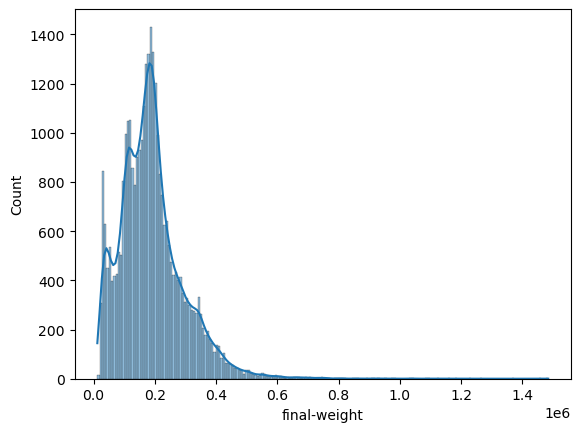

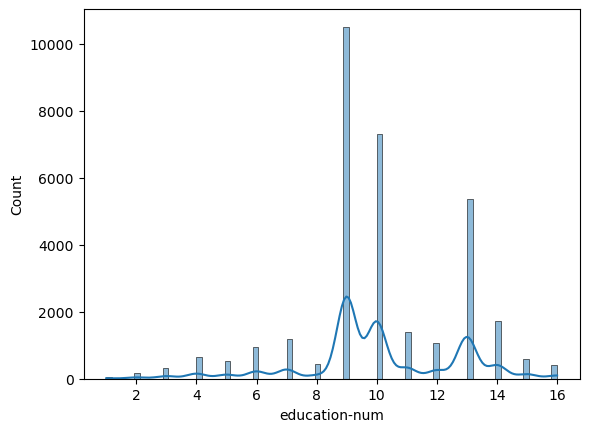

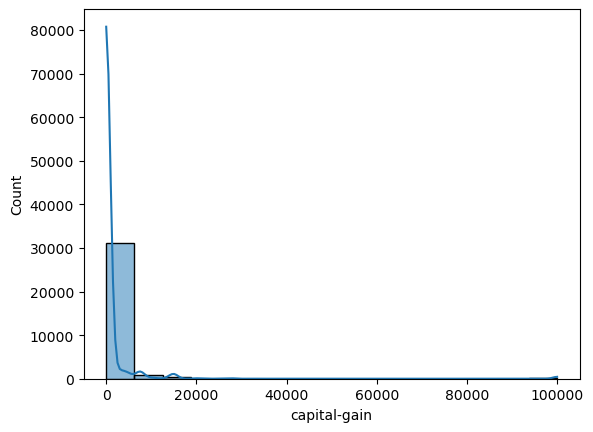

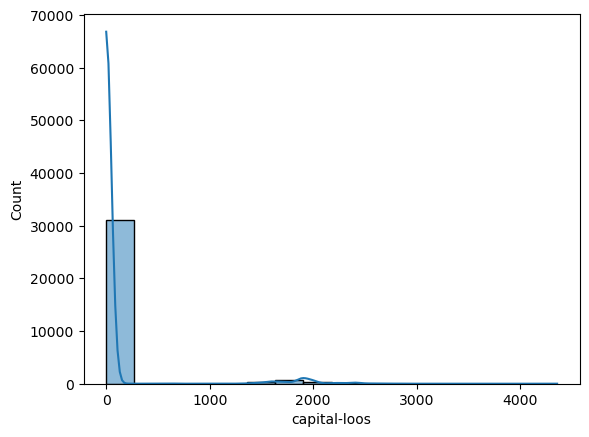

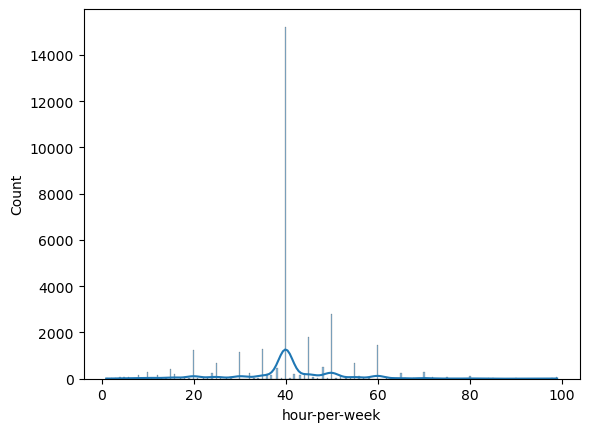

In [26]:
# frequencias
for i in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(x=df[i], kde=True)

In [ ]:
# correlacoes


## RELATORIO
1. **Idade (Age)**: A média é de 38,6 anos, com a maioria das pessoas entre 28 e 48 anos, e a faixa etária vai de 17 a 90 anos.  
2. **Peso Final (Final-Weight)**: A média é de 189.778, com uma grande variação, indicando diferentes grupos com características distintas.  
3. **Educação (Education-Num)**: A média de anos de educação é 10,08, indicando que a maioria possui até o ensino médio.  
4. **Ganhos de Capital (Capital-Gain)**: A maioria não tem ganhos de capital, com a média de 1.077,65 e um valor máximo de 99.999.  
5. **Perdas de Capital (Capital-Loss)**: A média é 87,3, com muitos valores zero, indicando poucas perdas significativas.  
6. **Horas por Semana (Hour-per-week)**: A média de 40,44 horas sugere uma carga horária de tempo integral, com muitos trabalhando 40 horas semanais.
7. **Classe de Trabalho (Workclass)**: A maioria das pessoas trabalha no setor privado (Private), com 22.696 observações nessa categoria.  
2. **Educação (Education)**: A maior parte das pessoas tem o ensino médio completo (HS-grad), com 10.501 registros nessa categoria.  
3. **Estado Civil (Marital-Status)**: A maior parte é casada (Married-civ-spouse), com 14.976 pessoas nessa situação.  
4. **Ocupação (Occupation)**: A maioria trabalha em profissões especializadas (Prof-specialty), com 4.140 registros nessa categoria.  
5. **Relacionamento (Relationship)**: A maior parte das pessoas se identifica como marido (Husband), com 13.193 registros.  
6. **Raça (Race)**: A maioria das pessoas é branca (White), com 27.816 registros dessa etnia.  
7. **Sexo (Sex)**: A maioria é do sexo masculino (Male), com 21.790 homens na amostra.  
8. **País de Origem (Native-Country)**: A maioria das pessoas é dos Estados Unidos (United-States), com 29.170 pessoas dessa nacionalidade.  
9. **Renda (Income)**: A maioria tem renda inferior ou igual a 50K (<=50K), com 24.720 registros nessa faixa de renda.